In [10]:
# Phân loại hình ảnh động vật

from tensorflow.keras import layers, models

# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 lớp: chó, mèo, thỏ
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
#  Nhận diện chữ viết tay

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Tải dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 chữ số (0-9)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Found 55 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5044 - loss: 1.7540 - val_accuracy: 0.5000 - val_loss: 0.8549
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 802ms/step - accuracy: 0.5157 - loss: 0.9421 - val_accuracy: 0.5000 - val_loss: 0.7970
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 839ms/step - accuracy: 0.4722 - loss: 0.7936 - val_accuracy: 0.5000 - val_loss: 0.6960
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 819ms/step - accuracy: 0.4939 - loss: 0.6957 - val_accuracy: 0.5833 - val_loss: 0.6924
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 670ms/step - accuracy: 0.5061 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 677ms/step - accuracy: 0.5061 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 690ms/step - accuracy: 0.4852 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6951
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 841ms/step - accuracy: 0.4698 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.

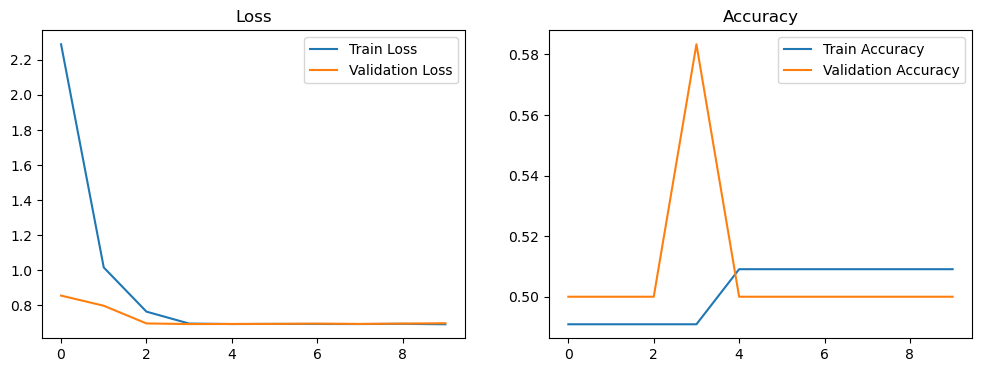

Found 69 images belonging to 2 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - accuracy: 0.5271 - loss: 0.6922
Test Loss: 0.6931365728378296
Test Accuracy: 0.5072463750839233


In [2]:
# Import thư viện cần thiết
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Chuẩn hóa ảnh (scale pixel từ 0-255 thành 0-1)
    validation_split=0.2,         # Chia dữ liệu thành 80% train, 20% validation
    rotation_range=20,            # Xoay ảnh ngẫu nhiên (data augmentation)
    width_shift_range=0.2,        # Dịch chuyển chiều rộng
    height_shift_range=0.2,       # Dịch chuyển chiều cao
    shear_range=0.2,              # Biến dạng cắt (shearing)
    zoom_range=0.2,               # Phóng to, thu nhỏ ngẫu nhiên
    horizontal_flip=True          # Lật ngang
)

# Tạo generator cho tập train
train_generator = train_datagen.flow_from_directory(
    'data_2-4/train',                 # Đường dẫn thư mục train
    target_size=(150, 150),       # Resize ảnh về kích thước 150x150
    batch_size=32,                # Kích thước batch
    class_mode='binary',          # Phân loại nhị phân
    subset='training'             # Lấy 80% dữ liệu cho training
)

# Tạo generator cho tập validation
validation_generator = train_datagen.flow_from_directory(
    'data_2-4/train',                 # Đường dẫn thư mục train
    target_size=(150, 150),       # Resize ảnh về kích thước 150x150
    batch_size=32,                # Kích thước batch
    class_mode='binary',          # Phân loại nhị phân
    subset='validation'           # Lấy 20% dữ liệu cho validation
)

# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 1 lớp: Bệnh (1) hoặc Không bệnh (0)
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(
    train_generator,              # Tập huấn luyện
    epochs=10,                    # Số lượng epochs
    validation_data=validation_generator  # Tập validation
)

# Lưu mô hình
model.save('chest_xray_cnn_model.h5')

# Hiển thị lịch sử huấn luyện (Loss và Accuracy)
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

# Kiểm tra mô hình trên tập test
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'data_2-4/test',                  # Đường dẫn thư mục test
    target_size=(150, 150),       # Resize ảnh về kích thước 150x150
    batch_size=32,                # Kích thước batch
    class_mode='binary'           # Phân loại nhị phân
)

# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
